In [4]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
# from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
# from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np

In [6]:
frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
mol = Chem.MolFromMolFile('mol.txt')
Draw.MolToImage(mol)
frag_frame.drop('Molecule',axis=1)

,Smiles,numAttachments,Atoms,xyz,Labels,atom_types
0,[20*]N1C(=O)N[C@]([21*])([22*])C1=O,3,"[12, 13, 14, 15, 16, 17, 18, 38]","[[-0.4386326968, -0.0139950117, 1.0365203185],...","[N, C, O, C, N, C, O, H]","[(N, 24, 3), (C, 32, 3), (O, 4, 1), (C, 44, 4)..."
1,[21*]C,1,"[19, 39, 40, 41]","[[-1.8018445547, 1.543861515, -1.6194984821], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
2,[20*]C[24*],2,"[11, 36, 37]","[[0.7894540784, -0.6694717061, 1.3797296796], ...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
3,[18*]C,1,"[28, 46, 47, 48]","[[4.9471607037, -2.8791008972, 0.5208602322], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
4,[17*]C,1,"[1, 29, 30, 31]","[[6.3029036612, 2.529091976, -1.2083943192], [...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
5,[23*]C#N,1,"[26, 27]","[[-7.5892175759, -1.0842080976, -0.4233090154]...","[C, N]","[(C, 14, 2), (N, 4, 1)]"
6,[19*]NC([24*])=O,2,"[8, 9, 10, 35]","[[3.1392945263, -0.6803954461, 0.8420092158], ...","[N, C, O, H]","[(N, 19, 3), (C, 32, 3), (O, 4, 1), (H, 5, 1)]"
7,[17*]c1ccc([18*])c([19*])c1,3,"[2, 3, 4, 5, 6, 7, 32, 33, 34]","[[5.9681947834, 1.1299306517, -0.7464804937], ...","[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
8,[22*]c1ccc([23*])cc1,2,"[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[[-3.5967751015, 0.3077302347, -0.3127842213],...","[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[20*]N1C(=O)N[C@]([21*])([22*])C1=O,,3,"[12, 13, 14, 15, 16, 17, 18, 38]","[[-0.4386326968, -0.0139950117, 1.0365203185],...","[N, C, O, C, N, C, O, H]","[(N, 24, 3), (C, 32, 3), (O, 4, 1), (C, 44, 4)..."
1,[21*]C,,1,"[19, 39, 40, 41]","[[-1.8018445547, 1.543861515, -1.6194984821], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
2,[20*]C[24*],,2,"[11, 36, 37]","[[0.7894540784, -0.6694717061, 1.3797296796], ...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
3,[18*]C,,1,"[28, 46, 47, 48]","[[4.9471607037, -2.8791008972, 0.5208602322], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
4,[17*]C,,1,"[1, 29, 30, 31]","[[6.3029036612, 2.529091976, -1.2083943192], [...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
5,[23*]C#N,,1,"[26, 27]","[[-7.5892175759, -1.0842080976, -0.4233090154]...","[C, N]","[(C, 14, 2), (N, 4, 1)]"
6,[19*]NC([24*])=O,,2,"[8, 9, 10, 35]","[[3.1392945263, -0.6803954461, 0.8420092158], ...","[N, C, O, H]","[(N, 19, 3), (C, 32, 3), (O, 4, 1), (H, 5, 1)]"
7,[17*]c1ccc([18*])c([19*])c1,,3,"[2, 3, 4, 5, 6, 7, 32, 33, 34]","[[5.9681947834, 1.1299306517, -0.7464804937], ...","[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
8,[22*]c1ccc([23*])cc1,,2,"[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[[-3.5967751015, 0.3077302347, -0.3127842213],...","[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."

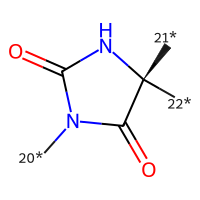
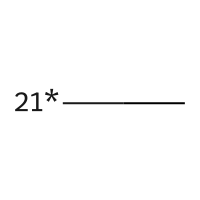
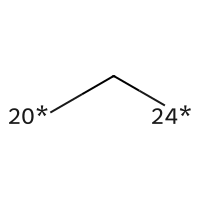
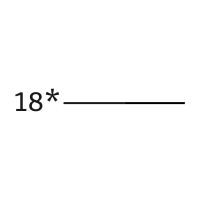
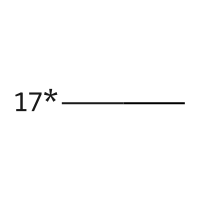
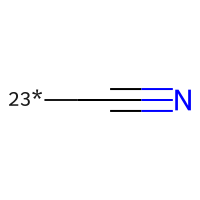
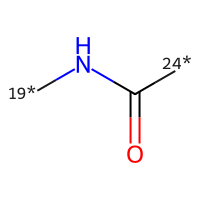
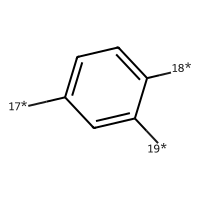
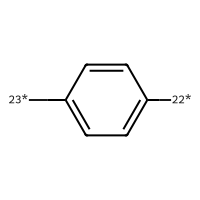

In [7]:
frag_frame

CPU times: user 269 µs, sys: 126 µs, total: 395 µs
Wall time: 533 µs


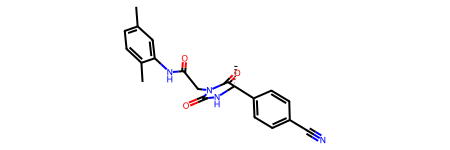

In [12]:
from group_decomposition import utils
%time Chem.MolFromMolFile('mol.txt')

[10:21:15] Running LargestFragmentChooser
[10:21:15] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[10:21:15] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[1*]c1ccc([2*])c([3*])c1,,3,"[2, 3, 4, 5, 6, 7, 32, 33, 34]","[[5.9681947834, 1.1299306517, -0.7464804937], ...","[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
1,[5*]C,,1,"[19, 39, 40, 41]","[[-1.8018445547, 1.543861515, -1.6194984821], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
2,[2*]C(=O)N[3*],,2,"[9, 8, 10, 35]","[[1.9468679815, -0.1096531685, 0.5482125474], ...","[C, N, O, H]","[(C, 32, 3), (N, 19, 3), (O, 4, 1), (H, 5, 1)]"
3,[7*]C#N,,1,"[26, 27]","[[-7.5892175759, -1.0842080976, -0.4233090154]...","[C, N]","[(C, 14, 2), (N, 4, 1)]"
4,[2*]C[4*],,2,"[11, 36, 37]","[[0.7894540784, -0.6694717061, 1.3797296796], ...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
5,[2*]C,,1,"[28, 46, 47, 48]","[[4.9471607037, -2.8791008972, 0.5208602322], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
6,[6*]c1ccc([7*])cc1,,2,"[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[[-3.5967751015, 0.3077302347, -0.3127842213],...","[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
7,[1*]C,,1,"[1, 29, 30, 31]","[[6.3029036612, 2.529091976, -1.2083943192], [...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
8,[4*]N1C(=O)N[C@]([5*])([6*])C1=O,,3,"[12, 13, 14, 15, 16, 17, 18, 38]","[[-0.4386326968, -0.0139950117, 1.0365203185],...","[N, C, O, C, N, C, O, H]","[(N, 24, 3), (C, 32, 3), (O, 4, 1), (C, 44, 4)..."

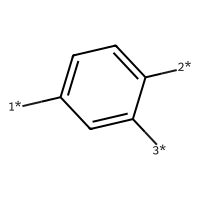
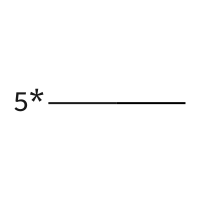
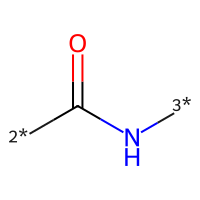
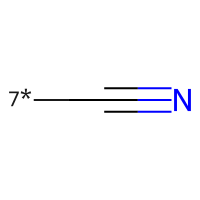
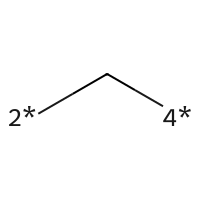
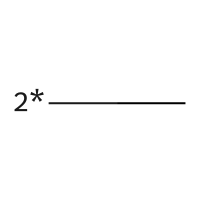
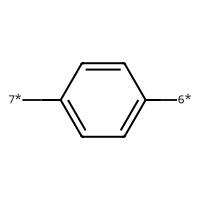
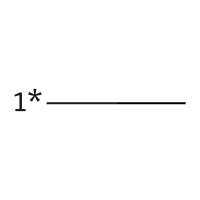
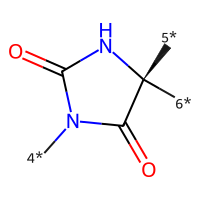

In [3]:
ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')

,Smiles,xyz,Atoms,Labels,Molecule,count,numAttachments
0,*c1ccc(*)c(*)c1,"[[5.9681947834, 1.1299306517, -0.7464804937], ...","[2, 3, 4, 5, 6, 7, 32, 33, 34]","[C, C, C, C, C, C, H, H, H]",,1,3
1,*C,"[[-1.8018445547, 1.543861515, -1.6194984821], ...","[19, 39, 40, 41]","[C, H, H, H]",,3,1
2,*C#N,"[[-7.5892175759, -1.0842080976, -0.4233090154]...","[26, 27]","[C, N]",,1,1
3,*NC(*)=O,"[[1.9468679815, -0.1096531685, 0.5482125474], ...","[9, 8, 10, 35]","[C, N, O, H]",,1,2
4,*c1ccc(*)cc1,"[[-3.5967751015, 0.3077302347, -0.3127842213],...","[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[C, C, C, C, C, C, H, H, H, H]",,1,2
5,*N1C(=O)NC(*)(*)C1=O,"[[-0.4386326968, -0.0139950117, 1.0365203185],...","[12, 13, 14, 15, 16, 17, 18, 38]","[N, C, O, C, N, C, O, H]",,1,3
6,*C*,"[[0.7894540784, -0.6694717061, 1.3797296796], ...","[11, 36, 37]","[C, H, H]",,1,2

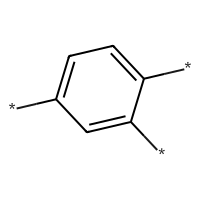
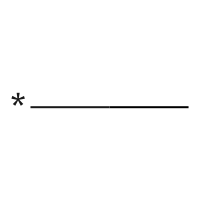
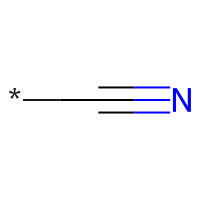
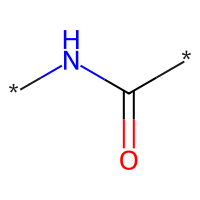
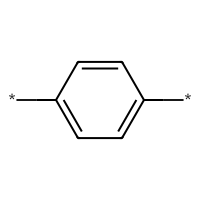
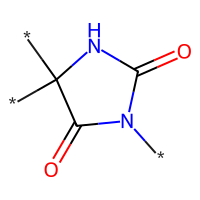
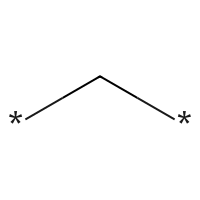

In [4]:
unique_frame = ff.count_uniques(frag_frame)
unique_frame

In [5]:
ff.output_ifc_gjf(mol,  unique_frame)

In [6]:
mol = Chem.MolFromMolFile('DUDE_11814594_dpp4_decoys_C18H23N3O4S_CIR.mol')
mol

OSError: Bad input file DUDE_11814594_dpp4_decoys_C18H23N3O4S_CIR.mol

In [ ]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()

In [ ]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([mol],params)

[11:40:07] Running LargestFragmentChooser
[11:40:07] Fragment: CN(C(=O)[C@@H]1CC2~N~C(NC(=O)C3CCC3)~SC~2C(=O)C1)[C@@H]1CCOC1
[11:40:07] New largest fragment: CN(C(=O)[C@@H]1CC2~N~C(NC(=O)C3CCC3)~SC~2C(=O)C1)[C@@H]1CCOC1 (49)


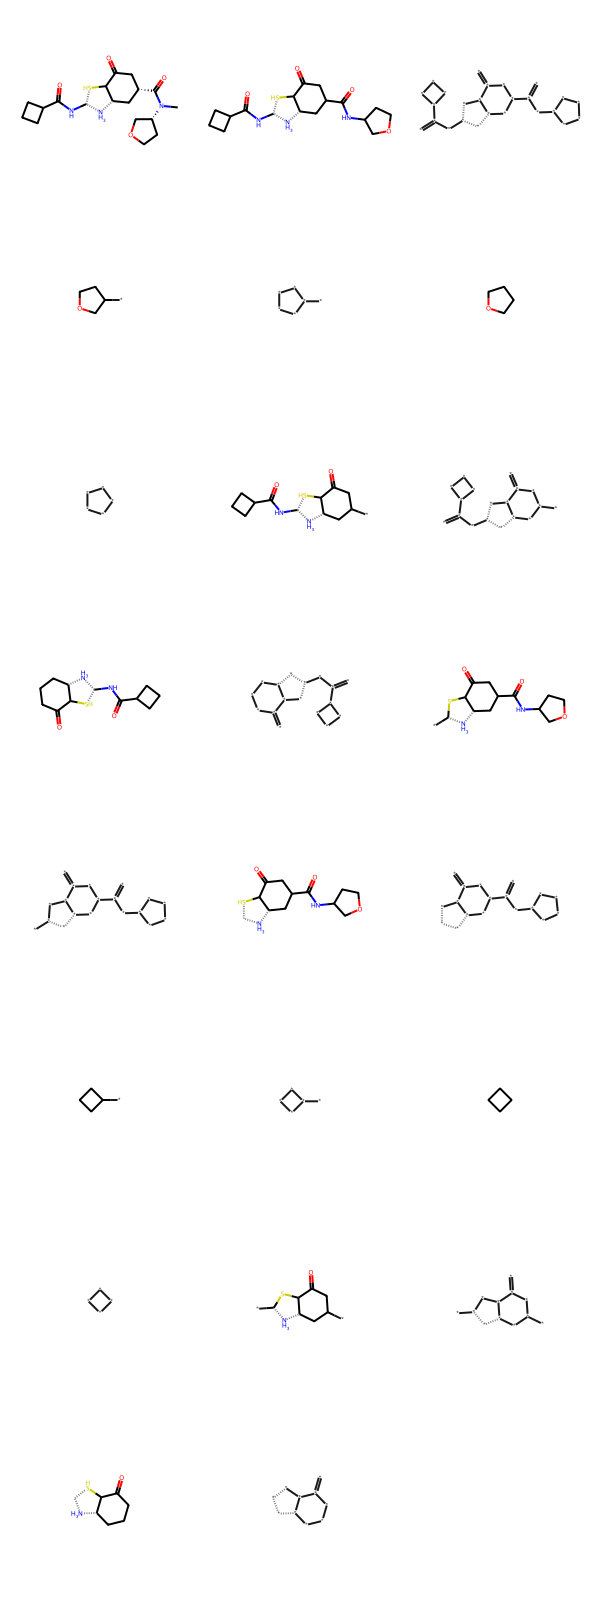

In [ ]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in net.nodes])

In [ ]:
mol = Chem.MolFromMolFile('Data/mol1.txt')
test_frame = ff.identify_connected_fragments('Data/mol1.txt',input_type='molfile',cml_file='Data/cml1.txt')

[15:30:55] Running LargestFragmentChooser
[15:30:55] Fragment: [C:1]([C:2]([N+:3]([C:4]([C:5]([H:41])([H:42])[H:43])([H:39])[H:40])([C@@:6]([C:7]([c:8]1[c:9]([H:47])[c:10]([H:48])[c:11]([H:49])[c:12]([H:50])[c:13]1[H:51])([H:45])[H:46])([C:14]([N:15]([C:16](=[O:17])[c:18]1[c:19]([H:55])[c:20]([H:56])[c:21]([Cl:32])[c:22]([N:24]([C:25](=[O:26])[c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([H:61])[s:31]2)[H:58])[c:23]1[H:57])[H:54])([H:52])[H:53])[H:44])[H:38])([H:36])[H:37])([H:33])([H:34])[H:35]
[15:30:55] New largest fragment: [C:1]([C:2]([N+:3]([C:4]([C:5]([H:41])([H:42])[H:43])([H:39])[H:40])([C@@:6]([C:7]([c:8]1[c:9]([H:47])[c:10]([H:48])[c:11]([H:49])[c:12]([H:50])[c:13]1[H:51])([H:45])[H:46])([C:14]([N:15]([C:16](=[O:17])[c:18]1[c:19]([H:55])[c:20]([H:56])[c:21]([Cl:32])[c:22]([N:24]([C:25](=[O:26])[c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([H:61])[s:31]2)[H:58])[c:23]1[H:57])[H:54])([H:52])[H:53])[H:44])[H:38])([H:36])[H:37])([H:33])([H:34])[H:35] (61)


In [ ]:
ff.output_ifc_gjf(mol,test_frame)

UnboundLocalError: cannot access local variable 'end_xyz' where it is not associated with a value

In [ ]:
test_frame['xyz'][0]

[[-3.5907088056, 0.341410257, 0.8189659915],
 [-2.5137667948, 0.3719258893, 1.3460387396],
 [-4.8387580023, 0.3123797798, 1.6156127988],
 [-4.881678994, 0.5882545004, 2.9378697054],
 [-6.1997285905, 0.507376008, 3.4830779953],
 [-4.0057847306, 0.8445688755, 3.5004619304],
 [-6.4350760311, 0.6956517063, 4.5124572609],
 [-8.1691156135, 0.0266112432, 2.6959431011]]

In [ ]:
test_frame['xyz'][8][1]

[-1.4724865805, -0.1336843222, -1.2495711045]

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[5*]c1cccs1,,1,"[27, 28, 29, 30, 31, 59, 60, 61]","[[-3.5907088056, 0.341410257, 0.8189659915], [...","[C, C, C, C, S, H, H, H]"
1,[3*]Cl,,1,[32],"[[-7.1163194557, 0.1653491968, 2.5562795322]]",[Cl]
2,[2*]c1ccc([3*])c([4*])c1,,3,"[18, 19, 20, 21, 22, 23, 55, 56, 57]","[[0.8578905637, -0.6019581943, -1.8233955263],...","[C, C, C, C, C, C, H, H, H]"
3,[1*]C[C@H]([6*])C[9*],,3,"[7, 6, 14, 44, 45, 46, 52, 53]","[[3.9994035781, -0.2500568117, -0.9223857516],...","[C, C, C, H, H, H, H, H]"
4,[6*][NH+]([7*])[8*],,3,"[3, 38]","[[3.4548488097, -1.128417194, 0.1982406638], [...","[N, H]"
5,[7*]CC,,1,"[2, 1, 33, 34, 35, 36, 37]","[[4.0749455854, -2.4971661329, 0.2775730733], ...","[C, C, H, H, H, H, H]"
6,[1*]c1ccccc1,,1,"[8, 9, 10, 11, 12, 13, 47, 48, 49, 50, 51]","[[3.7175655305, 0.755788013, -0.652716246], [5...","[C, C, C, C, C, C, H, H, H, H, H]"
7,[8*]CC,,1,"[4, 5, 39, 40, 41, 42, 43]","[[2.4862851821, -1.2991953632, -0.0655458604],...","[C, C, H, H, H, H, H]"
8,[4*]NC([5*])=O,,2,"[24, 25, 26, 58]","[[-2.738328841, 0.3881973032, -1.4962890674], ...","[N, C, O, H]"
9,[2*]C(=O)N[9*],,2,"[16, 15, 17, 54]","[[3.2821017186, -0.5989108781, -2.2438916644],...","[C, N, O, H]"

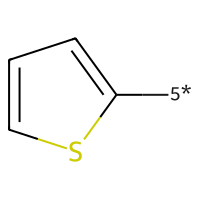
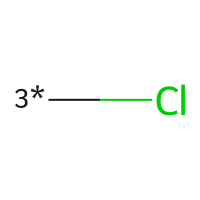
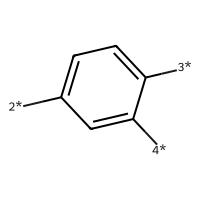
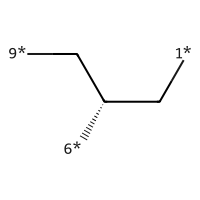
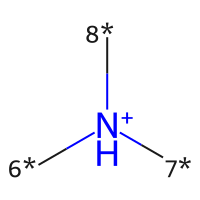
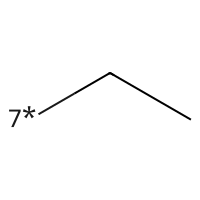
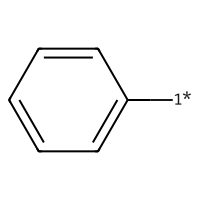
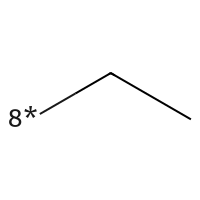
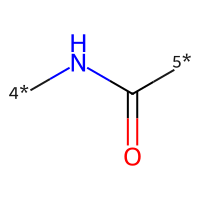
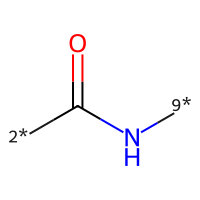

In [ ]:
test_frame

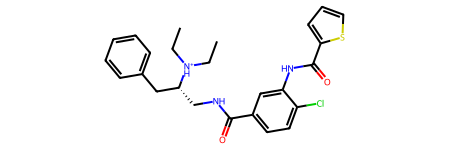

In [ ]:
Chem.MolFromSmiles(Chem.MolToSmiles(mol))

In [ ]:
at_at = mol.GetAtomWithIdx(26)
for atom in at_at.GetNeighbors():
    print(atom.GetAtomicNum())

6
6
16


In [ ]:
Chem.MolFromMolFile('Data/mol1.mol')

[16:15:33] Explicit valence for atom # 2 N, 4, is greater than permitted


In [ ]:
"HI" in "CHILL"

True

In [ ]:
from group_decomposition import utils
utils.mol_from_xyzfile('DUDE_03229393_inha_decoys_C17H8F5N3O_CIR.xyz','DUDE_03229393_inha_decoys_C17H8F5N3O_CIR.cml')

{'Molecule': <rdkit.Chem.rdchem.Mol at 0x13f6c5030>,
 'xyz_pos': [[-7.48366, -1.4766, -8e-05],
  [-6.41428, -2.40801, 0.00029],
  [-5.12574, -1.98002, -4e-05],
  [-4.83624, -0.59117, -0.00074],
  [-5.89469, 0.33475, -0.00109],
  [-7.23127, -0.14234, -0.00075],
  [-5.56145, 1.71177, -0.00178],
  [-4.2583, 2.08825, -0.00208],
  [-3.27361, 1.07164, -0.00166],
  [-3.54209, -0.19457, -0.00102],
  [-1.82114, 1.49128, -0.00205],
  [-1.50551, 2.64082, -0.00214],
  [-0.95631, 0.44084, -0.00112],
  [0.37333, 0.64417, -0.00066],
  [1.10682, -0.37425, 0.00015],
  [2.57983, -0.29251, 0.00076],
  [3.30958, -1.47428, -0.00143],
  [4.68489, -1.4999, -0.00101],
  [5.37996, -0.31203, 0.00168],
  [4.69143, 0.88162, 0.00403],
  [3.31345, 0.89079, 0.00363],
  [2.72218, 2.0592, 0.00609],
  [5.35882, 2.01686, 0.00678],
  [6.69255, -0.31531, 0.00216],
  [5.33173, -2.64754, -0.0032],
  [2.67411, -2.63509, -0.00398],
  [-8.49667, -1.83594, 0.00019],
  [-6.63315, -3.46046, 0.00084],
  [-4.3022, -2.66935, 0.00023

[11:55:48] Running LargestFragmentChooser
[11:55:48] Fragment: [H]/C(=N\N([H])C(=O)c1nc2c([H])c([H])c([H])c([H])c2c([H])c1[H])c1c(F)c(F)c(F)c(F)c1F
[11:55:48] New largest fragment: [H]/C(=N\N([H])C(=O)c1nc2c([H])c([H])c([H])c([H])c2c([H])c1[H])c1c(F)c(F)c(F)c(F)c1F (34)


,Smiles,Molecule
0,[3*]F,
1,[7*]F,
2,[5*]F,
3,[1*]C(=O)N/N=C/[2*],
4,[4*]F,
5,[6*]F,
6,[1*]c1ccc2ccccc2n1,
7,[2*]c1c([3*])c([4*])c([5*])c([6*])c1[7*],

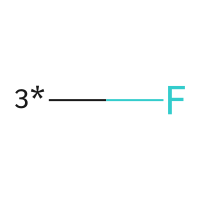
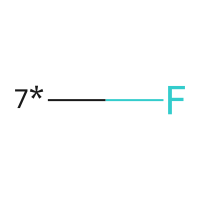
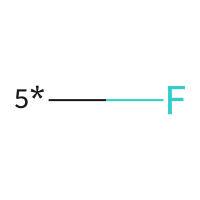
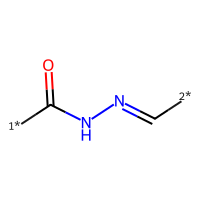
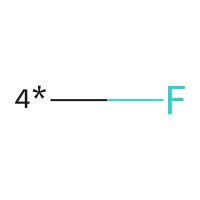
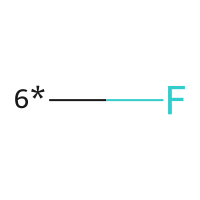
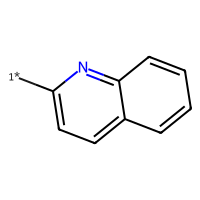
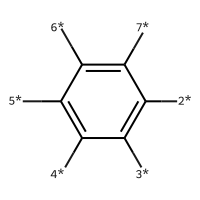

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDetermineBonds
raw_mol = Chem.MolFromXYZFile('DUDE_03229393_inha_decoys_C17H8F5N3O_CIR.xyz')
mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(mol,charge=0)
mol_frame = ff.generate_full_mol_frame(mol)
fragment_smiles = ff._trim_molpart(mol_frame,mol_frame['molPart'].unique(),mol)
full_smi = ff._break_molparts(fragment_smiles['smiles'],fragment_smiles['count']
                               ,drop_parent=True,patt='[$([C;X4;!R]):1]-[$([R,!$([C;X4]);!#0;!#9;!#17;!#35;!#1]):2]')
ff._generate_fragment_frame(full_smi)

In [ ]:
'C         -7.48366       -1.47660       -0.00008'.split()

['C', '-7.48366', '-1.47660', '-0.00008']

[14:06:44] Running LargestFragmentChooser
[14:06:44] Fragment: [c:1]1([H:27])[c:2]([H:28])[c:3]([H:29])[c:4]2[c:5]([c:6]1[H:30])[c:7]([H:31])[c:8]([H:32])[c:9]([C:11](=[O:12])[N:13](/[N:14]=[C:15](/[c:16]1[c:17]([F:26])[c:18]([F:25])[c:19]([F:24])[c:20]([F:23])[c:21]1[F:22])[H:34])[H:33])[n:10]2
[14:06:44] New largest fragment: [c:1]1([H:27])[c:2]([H:28])[c:3]([H:29])[c:4]2[c:5]([c:6]1[H:30])[c:7]([H:31])[c:8]([H:32])[c:9]([C:11](=[O:12])[N:13](/[N:14]=[C:15](/[c:16]1[c:17]([F:26])[c:18]([F:25])[c:19]([F:24])[c:20]([F:23])[c:21]1[F:22])[H:34])[H:33])[n:10]2 (34)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[5*]F,,1,[24],"[[6.69255, -0.31531, 0.00216]]",[F],"[(F, 4, 1)]"
1,[4*]F,,1,[25],"[[5.33173, -2.64754, -0.0032]]",[F],"[(F, 4, 1)]"
2,[1*]C(=O)N/N=C/[2*],,2,"[11, 12, 13, 14, 15, 33, 34]","[[-1.82114, 1.49128, -0.00205], [-1.50551, 2.6...","[C, O, N, N, C, H, H]","[(C, 32, 3), (O, 4, 1), (N, 22, 3), (N, 14, 2)..."
3,[3*]F,,1,[26],"[[2.67411, -2.63509, -0.00398]]",[F],"[(F, 4, 1)]"
4,[7*]F,,1,[22],"[[2.72218, 2.0592, 0.00609]]",[F],"[(F, 4, 1)]"
5,[1*]c1ccc2ccccc2n1,,1,"[9, 8, 7, 5, 4, 3, 2, 1, 6, 10, 27, 28, 29, 30...","[[-3.27361, 1.07164, -0.00166], [-4.2583, 2.08...","[C, C, C, C, C, C, C, C, C, N, H, H, H, H, H, H]","[(C, 27, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
6,[2*]c1c([3*])c([4*])c([5*])c([6*])c1[7*],,6,"[16, 17, 18, 19, 20, 21]","[[2.57983, -0.29251, 0.00076], [3.30958, -1.47...","[C, C, C, C, C, C]","[(C, 24, 3), (C, 33, 3), (C, 33, 3), (C, 33, 3..."
7,[6*]F,,1,[23],"[[5.35882, 2.01686, 0.00678]]",[F],"[(F, 4, 1)]"

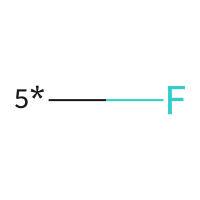
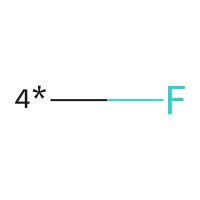
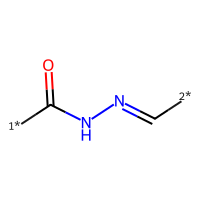
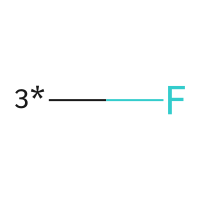
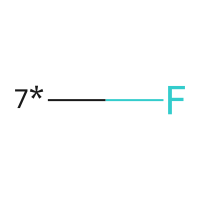
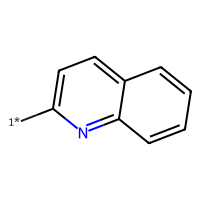
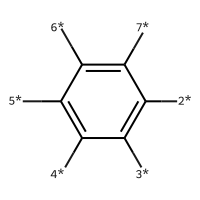
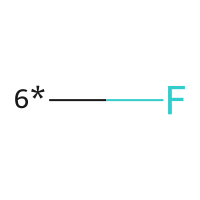

In [ ]:
from group_decomposition import fragfunctions as ff
ff.identify_connected_fragments('DUDE_03229393_inha_decoys_C17H8F5N3O_CIR.xyz',input_type = 'xyzfile',cml_file='DUDE_03229393_inha_decoys_C17H8F5N3O_CIR.cml')

Data/mol1.txt
Adding Data/mol1.txt
                     Smiles                                       Molecule  \
0                    [3*]Cl  <rdkit.Chem.rdchem.Mol object at 0x149e2f450>   
1                    [7*]CC  <rdkit.Chem.rdchem.Mol object at 0x149e2f5a0>   
2  [2*]c1ccc([3*])c([4*])c1  <rdkit.Chem.rdchem.Mol object at 0x149e2f060>   
3            [4*]NC([5*])=O  <rdkit.Chem.rdchem.Mol object at 0x149e2f530>   
4               [5*]c1cccs1  <rdkit.Chem.rdchem.Mol object at 0x149e2f680>   
5     [1*]C[C@H]([6*])C[9*]  <rdkit.Chem.rdchem.Mol object at 0x149e2f760>   
6              [1*]c1ccccc1  <rdkit.Chem.rdchem.Mol object at 0x149e2f920>   
7       [6*][NH+]([7*])[8*]  <rdkit.Chem.rdchem.Mol object at 0x149e2fae0>   
8            [2*]C(=O)N[9*]  <rdkit.Chem.rdchem.Mol object at 0x149e2fbc0>   
9                    [8*]CC  <rdkit.Chem.rdchem.Mol object at 0x149e2fa70>   

   numAttachments                                       Atoms  \
0               1                        

[14:37:41] Running LargestFragmentChooser
[14:37:41] Fragment: [C:1]([C:2]([N+:3]([C:4]([C:5]([H:41])([H:42])[H:43])([H:39])[H:40])([C@@:6]([C:7]([c:8]1[c:9]([H:47])[c:10]([H:48])[c:11]([H:49])[c:12]([H:50])[c:13]1[H:51])([H:45])[H:46])([C:14]([N:15]([C:16](=[O:17])[c:18]1[c:19]([H:55])[c:20]([H:56])[c:21]([Cl:32])[c:22]([N:24]([C:25](=[O:26])[c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([H:61])[s:31]2)[H:58])[c:23]1[H:57])[H:54])([H:52])[H:53])[H:44])[H:38])([H:36])[H:37])([H:33])([H:34])[H:35]
[14:37:41] New largest fragment: [C:1]([C:2]([N+:3]([C:4]([C:5]([H:41])([H:42])[H:43])([H:39])[H:40])([C@@:6]([C:7]([c:8]1[c:9]([H:47])[c:10]([H:48])[c:11]([H:49])[c:12]([H:50])[c:13]1[H:51])([H:45])[H:46])([C:14]([N:15]([C:16](=[O:17])[c:18]1[c:19]([H:55])[c:20]([H:56])[c:21]([Cl:32])[c:22]([N:24]([C:25](=[O:26])[c:27]2[c:28]([H:59])[c:29]([H:60])[c:30]([H:61])[s:31]2)[H:58])[c:23]1[H:57])[H:54])([H:52])[H:53])[H:44])[H:38])([H:36])[H:37])([H:33])([H:34])[H:35] (61)
[14:37:41] Running LargestFragm

                                     Smiles  \
0                               [5*]c1ccco1   
1  [3*]C1=C([4*])[C@H]([5*])C2=C(CCCC2=O)N1   
2                                 [3*]S[8*]   
3                             [1*]C([6*])=O   
4                                   [4*]C#N   
5                            [2*]NC([7*])=O   
6                                     [6*]C   
7                                 [7*]C[8*]   
8                        [1*]c1ccc([2*])cc1   

                                        Molecule  numAttachments  \
0  <rdkit.Chem.rdchem.Mol object at 0x149e2f760>               1   
1  <rdkit.Chem.rdchem.Mol object at 0x149e2fa70>               3   
2  <rdkit.Chem.rdchem.Mol object at 0x149e2fca0>               2   
3  <rdkit.Chem.rdchem.Mol object at 0x149e2f920>               2   
4  <rdkit.Chem.rdchem.Mol object at 0x149e2f3e0>               1   
5  <rdkit.Chem.rdchem.Mol object at 0x149e2fe60>               2   
6  <rdkit.Chem.rdchem.Mol object at 0x149e2ee30>     

,Smiles,xyz,Atoms,Parent,Labels,Molecule,count,numAttachments
0,*Cl,"[[5.6525, 2.1963, 3.4074]]",[32],,[Cl],,1,1
1,*CC,"[[-3.1396, 1.1911, -0.9158], [-2.6191, 2.4707,...","[2, 1, 33, 34, 35, 36, 37]",,"[C, C, H, H, H, H, H]",,2,1
2,*c1ccc(*)c(*)c1,"[[1.5056, 0.5339, 2.7677], [1.933, 0.8809, 4.0...","[18, 19, 20, 21, 22, 23, 55, 56, 57]",,"[C, C, C, C, C, C, H, H, H]",,1,3
3,*c1cccs1,"[[5.4208, 1.5999, -1.4765], [6.5629, 2.342, -1...","[27, 28, 29, 30, 31, 59, 60, 61]",,"[C, C, C, C, S, H, H, H]",,1,1
4,*CC(*)C*,"[[-3.8297, -1.2128, 1.0227], [-2.434, -0.548, ...","[7, 6, 14, 44, 45, 46, 52, 53]",,"[C, C, C, H, H, H, H, H]",,1,3
5,*c1ccccc1,"[[-4.1686, -2.3027, 0.0314], [-3.6823, -3.6055...","[8, 9, 10, 11, 12, 13, 47, 48, 49, 50, 51]",,"[C, C, C, C, C, C, H, H, H, H, H]",,1,1
6,*[NH+](*)*,"[[-2.2594, -0.022, -0.6347], [-2.6285, -0.7794...","[3, 38]",,"[N, H]",,1,3
7,*c1cccc(*)c1*,"[[3.4048, -1.7669, -1.4438], [4.6805, -2.346, ...","[2, 3, 4, 5, 6, 7, 36, 37, 38]",,"[C, C, C, C, C, C, H, H, H]",,1,3
8,*C(C)C,"[[3.6911, -0.096, 2.0519], [4.4471, -0.556, 3....","[30, 31, 32, 65, 66, 67, 68, 69, 70, 71]",,"[C, C, C, H, H, H, H, H, H, H]",,1,1
9,*NC(=S)N(*)*,"[[1.8106, -0.3481, -0.2118], [1.2825, 0.5796, ...","[8, 9, 10, 11, 39]",,"[N, C, S, N, H]",,1,3

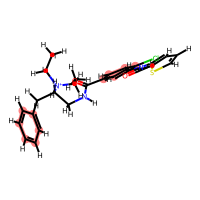
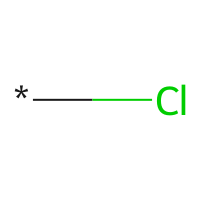
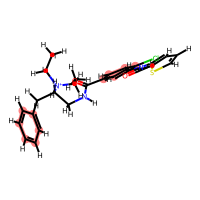
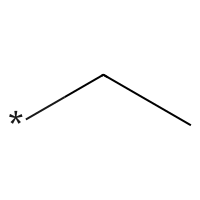
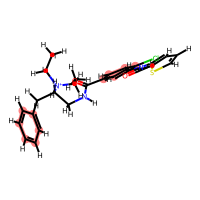
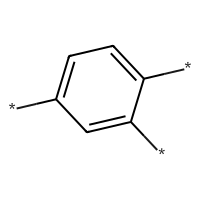
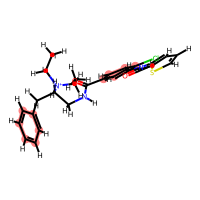
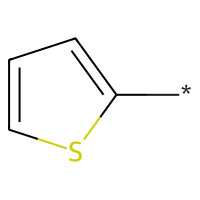
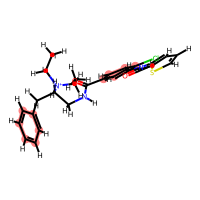
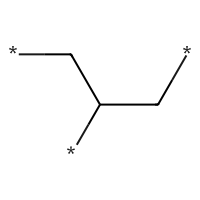
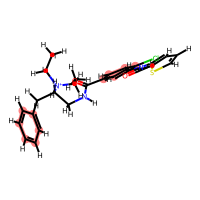
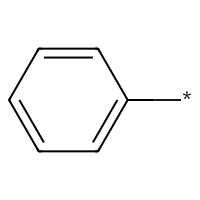
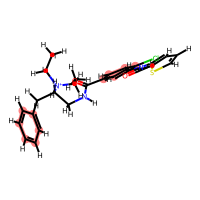
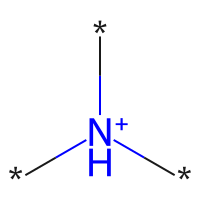
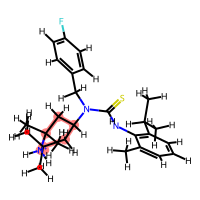
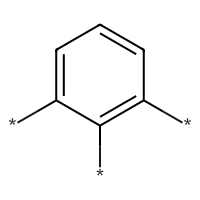
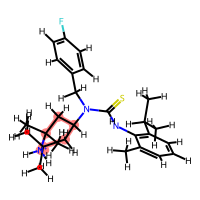
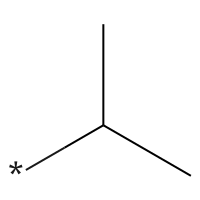
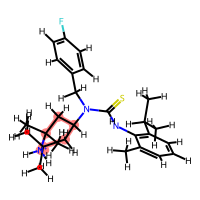
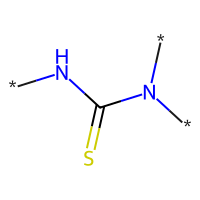
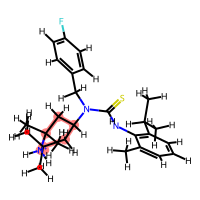
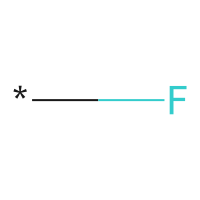
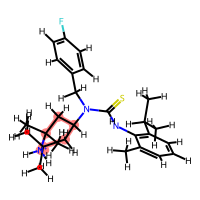
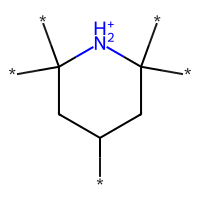
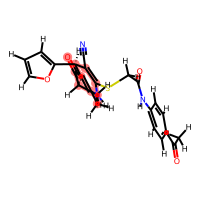
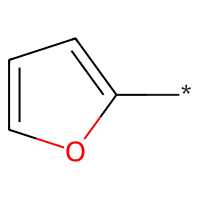
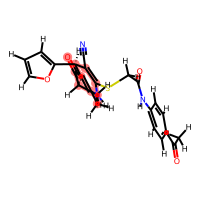
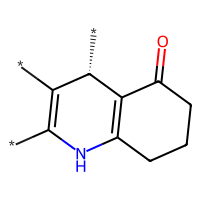
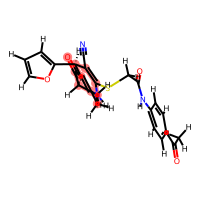
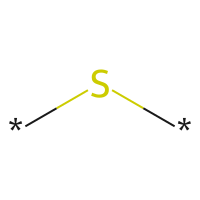
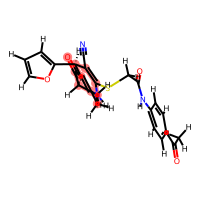
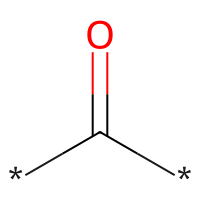
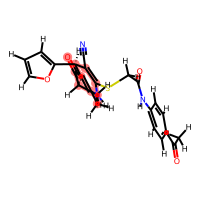
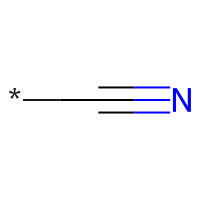
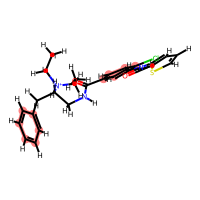
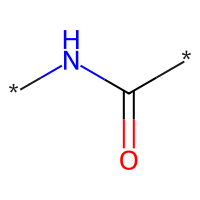
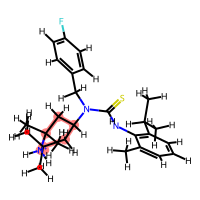
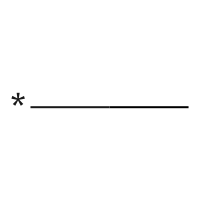
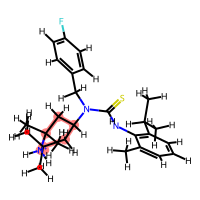
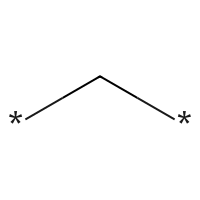
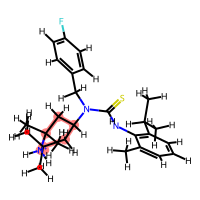
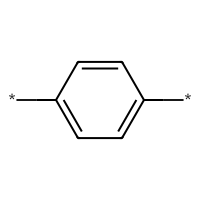

In [ ]:
from group_decomposition import fragfunctions as ff
from group_decomposition import utils
utils.get_cml_atom_types('Data/cml1.txt')
ff.count_groups_in_set(['Data/mol1.txt', 'Data/mol2.txt','Data/mol3.txt'],input_type='molfile')

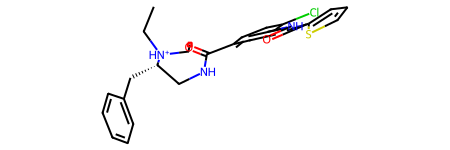

In [ ]:
Chem.MolFromMolFile('Data/mol1.txt')

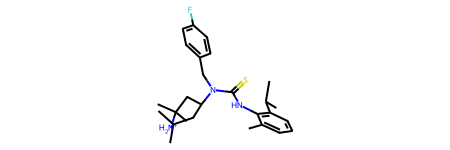

In [ ]:
Chem.MolFromMolFile('Data/mol2.txt')

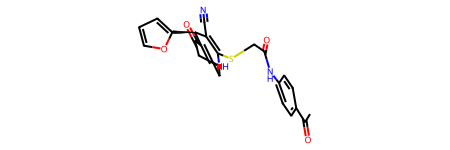

In [ ]:
Chem.MolFromMolFile('Data/mol3.txt')

In [ ]:
import pandas as pd
frame_a = pd.DataFrame([['a',1],['b',2]],columns=['letter','number'])
frame_b = pd.DataFrame([['c',1]],columns=['letter','number'])
merge_frame = pd.concat([frame_b,pd.DataFrame([list(frame_a.iloc[1])],columns=['letter','number'])])
merge_frame

,letter,number
0,c,1
0,b,2


In [ ]:
merge_frame.reset_index(inplace=True,drop=True)

[13:28:38] Running LargestFragmentChooser
[13:28:38] Fragment: [C:1]([C:2](=[O:3])[c:4]1[c:5]([H:36])[c:6]([H:37])[c:7]([N:10]([C:11](=[O:12])[C:13]([S:14][C:15]2=[C:16]([C:31]#[N:32])[C@@:17]([c:26]3[c:27]([H:51])[c:28]([H:52])[c:29]([H:53])[o:30]3)([H:43])[C:18]3=[C:19]([N:20]2[H:44])[C:21]([H:45])([H:46])[C:22]([H:47])([H:48])[C:23]([H:49])([H:50])[C:24]3=[O:25])([H:41])[H:42])[H:40])[c:8]([H:38])[c:9]1[H:39])([H:33])([H:34])[H:35]
[13:28:38] New largest fragment: [C:1]([C:2](=[O:3])[c:4]1[c:5]([H:36])[c:6]([H:37])[c:7]([N:10]([C:11](=[O:12])[C:13]([S:14][C:15]2=[C:16]([C:31]#[N:32])[C@@:17]([c:26]3[c:27]([H:51])[c:28]([H:52])[c:29]([H:53])[o:30]3)([H:43])[C:18]3=[C:19]([N:20]2[H:44])[C:21]([H:45])([H:46])[C:22]([H:47])([H:48])[C:23]([H:49])([H:50])[C:24]3=[O:25])([H:41])[H:42])[H:40])[c:8]([H:38])[c:9]1[H:39])([H:33])([H:34])[H:35] (53)


,Smiles,xyz,Atoms,Labels,Molecule,count,numAttachments
0,*C,"[[5.067, -3.2583, -3.282], [5.5086, -4.0609, -...","[1, 33, 34, 35]","[C, H, H, H]",,1,1
1,*c1ccco1,"[[-4.0833, 2.177, 0.9653], [-5.0772, 3.0934, 0...","[26, 27, 28, 29, 30, 51, 52, 53]","[C, C, C, C, O, H, H, H]",,1,1
2,*C#N,"[[-1.9561, 2.8506, 3.1098], [-2.0342, 3.6583, ...","[31, 32]","[C, N]",,1,1
3,*C*,"[[1.3558, 1.3715, 3.3267], [1.1219, 2.4372, 3....","[13, 41, 42]","[C, H, H]",,1,2
4,*NC(*)=O,"[[2.4188, -0.433, 2.0971], [2.0323, 0.899, 2.0...","[10, 11, 12, 40]","[N, C, O, H]",,1,2
5,*C(*)=O,"[[4.7382, -3.7891, -1.912], [4.9306, -4.9689, ...","[2, 3]","[C, O]",,1,2
6,*C1=C(*)[C@H](*)C2=C(CCCC2=O)N1,"[[-1.0605, 0.7746, 2.179], [-1.8269, 1.8875, 2...","[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 4...","[C, C, C, C, C, N, C, C, C, C, O, H, H, H, H, ...",,1,3
7,*S*,"[[-0.1657, 0.4167, 3.6526]]",[14],[S],,1,2
8,*c1ccc(*)cc1,"[[4.1512, -2.8629, -0.8989], [3.8189, -3.3742,...","[4, 5, 6, 7, 8, 9, 36, 37, 38, 39]","[C, C, C, C, C, C, H, H, H, H]",,1,2

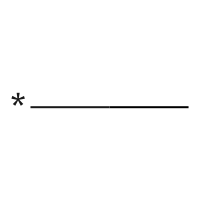
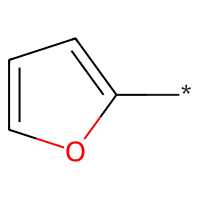
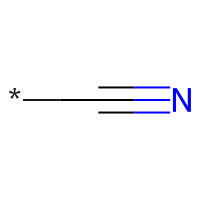
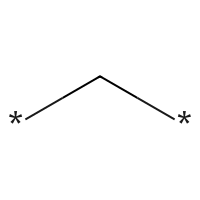
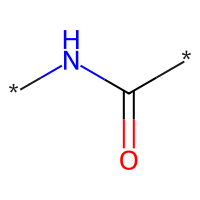
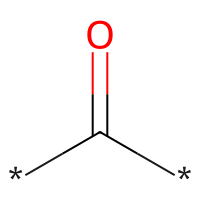
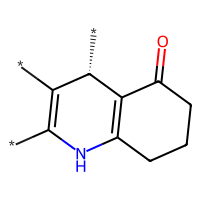
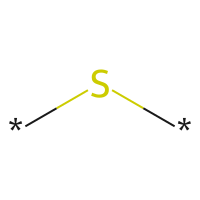
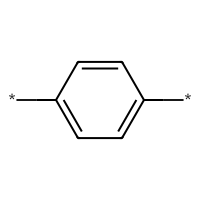

In [ ]:
ff.count_uniques(ff.identify_connected_fragments('Data/mol3.txt',input_type='molfile'))

In [13]:
%time utils.xyz_from_cml('cml.txt')

CPU times: user 1.44 ms, sys: 1.54 ms, total: 2.98 ms
Wall time: 3.63 ms


[[6.3029036612, 2.529091976, -1.2083943192],
 [5.9681947834, 1.1299306517, -0.7464804937],
 [6.868750537, 0.087072719, -0.8842524462],
 [6.5323275454, -1.1904966252, -0.4666620071],
 [5.296232478, -1.4726933098, 0.0902151167],
 [4.3938127231, -0.4146611566, 0.2333578493],
 [4.7300853837, 0.8653547348, -0.1721839958],
 [3.1392945263, -0.6803954461, 0.8420092158],
 [1.9468679815, -0.1096531685, 0.5482125474],
 [1.76921139, 0.7458112511, -0.2689501096],
 [0.7894540784, -0.6694717061, 1.3797296796],
 [-0.4386326968, -0.0139950117, 1.0365203185],
 [-1.1565006319, -0.3189888318, -0.0866558067],
 [-1.0118564757, -1.2818742115, -0.7678125611],
 [-2.1567522844, 0.8241453287, -0.3074221689],
 [-1.8635822763, 1.6599297467, 0.8442907407],
 [-0.7685374947, 1.2394119362, 1.5359913201],
 [-0.197042816, 1.8011922961, 2.4151982389],
 [-1.8018445547, 1.543861515, -1.6194984821],
 [-3.5967751015, 0.3077302347, -0.3127842213],
 [-4.5229716004, 0.7465706395, 0.6230875376],
 [-5.8317003051, 0.295310897, 0.5